In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/word2vec-for-text-summarization/__results__.html
/kaggle/input/word2vec-for-text-summarization/__notebook__.ipynb
/kaggle/input/word2vec-for-text-summarization/__output__.json
/kaggle/input/word2vec-for-text-summarization/w2v_text_summ_200d_09162019
/kaggle/input/word2vec-for-text-summarization/custom.css
/kaggle/input/sum/tensorflow2/pleasework/1/training_model (1).h5
/kaggle/input/latestfridaymorning/tensorflow2/last/1/embedding_11 (1).npz
/kaggle/input/latestfridaymorning/tensorflow2/last/1/embedding1 (1).npz
/kaggle/input/latestfridaymorning/tensorflow2/last/1/ytokenizer (1).pickle
/kaggle/input/latestfridaymorning/tensorflow2/last/1/lstm1 (1).npz
/kaggle/input/latestfridaymorning/tensorflow2/last/1/lstm_11 (1).npz
/kaggle/input/latestfridaymorning/tensorflow2/last/1/lstm_21 (1).npz
/kaggle/input/latestfridaymorning/tensorflow2/last/1/xtokenizer (1).pickle
/kaggle/input/latestfridaymorning/tensorflow2/last/1/time_distributed1 (1).npz
/kaggle/input/latestfridaymorning/

**Resources - **
1. https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python/
2. https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/
3. https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70
4. https://github.com/aravindpai/How-to-build-own-text-summarizer-using-deep-learning

In [20]:
summary = pd.read_csv('/kaggle/input/news-summary/news_summary.csv', encoding='iso-8859-1')
raw = pd.read_csv('/kaggle/input/news-summary/news_summary_more.csv', encoding='iso-8859-1')

In [21]:
pre1 =  raw.iloc[:,0:2].copy()

pre2 = summary.iloc[:,0:6].copy()
pre2['text'] = pre2['author'].str.cat(pre2['date'].str.cat(pre2['read_more'].str.cat(pre2['text'].str.cat(pre2['ctext'], sep = " "), sep =" "),sep= " "), sep = " ")

In [22]:
pre = pd.DataFrame()
pre['text'] = pd.concat([pre1['text'], pre2['text']], ignore_index=True)
pre['summary'] = pd.concat([pre1['headlines'],pre2['headlines']],ignore_index = True)

In [25]:
import re

#Removes non-alphabetic characters:
def text_strip(column):
    for row in column:
        
        #ORDER OF REGEX IS VERY VERY IMPORTANT!!!!!!
        
        row=re.sub("(\\t)", ' ', str(row)).lower() #remove escape charecters
        row=re.sub("(\\r)", ' ', str(row)).lower() 
        row=re.sub("(\\n)", ' ', str(row)).lower()
        
        row=re.sub("(__+)", ' ', str(row)).lower()   #remove _ if it occors more than one time consecutively
        row=re.sub("(--+)", ' ', str(row)).lower()   #remove - if it occors more than one time consecutively
        row=re.sub("(~~+)", ' ', str(row)).lower()   #remove ~ if it occors more than one time consecutively
        row=re.sub("(\+\++)", ' ', str(row)).lower()   #remove + if it occors more than one time consecutively
        row=re.sub("(\.\.+)", ' ', str(row)).lower()   #remove . if it occors more than one time consecutively
        
        row=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() #remove <>()|&©ø"',;?~*!
        
        row=re.sub("(mailto:)", ' ', str(row)).lower() #remove mailto:
        row=re.sub(r"(\\x9\d)", ' ', str(row)).lower() #remove \x9* in text
        row=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() #replace INC nums to INC_NUM
        row=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() #replace CM# and CHG# to CM_NUM
        
        
        row=re.sub("(\.\s+)", ' ', str(row)).lower() #remove full stop at end of words(not between)
        row=re.sub("(\-\s+)", ' ', str(row)).lower() #remove - at end of words(not between)
        row=re.sub("(\:\s+)", ' ', str(row)).lower() #remove : at end of words(not between)
        
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass #there might be emails with no url in them
        

        
        row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces
        
        #Should always be last
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces

        
        
        yield row




In [26]:
brief_cleaning1 = text_strip(pre['text'])
brief_cleaning2 = text_strip(pre['summary'])

In [27]:
from time import time
import spacy
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) 


t = time()

text = [str(doc) for doc in nlp.pipe(brief_cleaning1, batch_size=5000, n_threads=-1)]



Time to clean up everything: 9.09 mins


In [28]:


t = time()

summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(brief_cleaning2, batch_size=5000, n_threads=-1)]



Time to clean up everything: 2.18 mins


In [31]:
pre['cleaned_text'] = pd.Series(text)
pre['cleaned_summary'] = pd.Series(summary)

In [32]:
text_count = []
summary_count = []

In [33]:
for sent in pre['cleaned_text']:
    text_count.append(len(sent.split()))
for sent in pre['cleaned_summary']:
    summary_count.append(len(sent.split()))

In [34]:
graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count

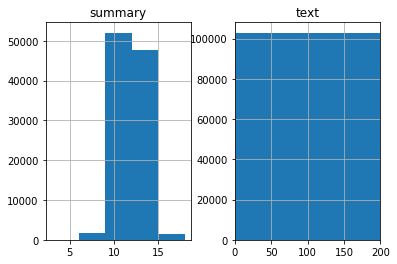

In [35]:
import matplotlib.pyplot as plt

graph_df['text'].hist(bins = 500)
plt.xlim(0,200)  
plt.show()
graph_df['summary'].hist(bins = 5)
plt.xlim(0, 20)  
plt.show()

In [37]:
cnt=0
for j in range(20):
    cnt=0
    for i in pre['cleaned_summary']:
        if(len(i.split())<=j):
            cnt=cnt+1
    print("word length:",j,cnt/len(pre['cleaned_summary']))

0.9578389933440218


In [ ]:
cnt=0
for j in range(100):
    cnt=0
    for i in pre['cleaned_text']:
        if(len(i.split())<=j):
            cnt=cnt+1
    print("word length:",j,cnt/len(pre['cleaned_text']))

In [38]:
max_text_len=100
max_summary_len=15

In [39]:
cleaned_text =np.array(pre['cleaned_text'])
cleaned_summary=np.array(pre['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})

In [41]:
#Add sostok and eostok at 
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')


**SEQ2SEQ MODEL BUILDING **

Split the data to TRAIN and VALIDATION sets

In [43]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(post_pre['text']),np.array(post_pre['summary']),test_size=0.1,random_state=0,shuffle=True)

In [44]:

from tensorflow.keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

Using TensorFlow backend.


**RARE WORD ANALYSIS FOR X i.e 'text'**
* tot_cnt gives the size of vocabulary (which means every unique words in the text)

* cnt gives me the no. of rare words whose count falls below threshold

* tot_cnt - cnt gives me the top most common words

In [45]:
thresh=5

for i in range(10):
    cnt=0
    tot_cnt=0
    freq=0
    tot_freq=0
    for key,value in x_tokenizer.word_counts.items():
        tot_cnt=tot_cnt+1
        tot_freq=tot_freq+value
        if(value<5):
            cnt=cnt+1
            freq=freq+value
    
    print("% of rare words in vocabulary:",i,(cnt/tot_cnt)*100)
    print("Total Coverage of rare words:",i,(freq/tot_freq)*100)

% of rare words in vocabulary: 57.91270391131826
Total Coverage of rare words: 1.3404923996005096


In [46]:

x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

Size of vocabulary in X = 33412


**RARE WORD ANALYSIS FOR Y i.e 'summary'**
* tot_cnt gives the size of vocabulary (which means every unique words in the text)

* cnt gives me the no. of rare words whose count falls below threshold

* tot_cnt - cnt gives me the top most common words

In [47]:
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [48]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0


for i in range(10):
    cnt=0
    tot_cnt=0
    freq=0
    tot_freq=0
    for key,value in y_tokenizer.word_counts.items():
        tot_cnt=tot_cnt+1
        tot_freq=tot_freq+value
        if(value<i):
            cnt=cnt+1
            freq=freq+value
    
    print("% of rare words in vocabulary:",i,(cnt/tot_cnt)*100)
    print("Total Coverage of rare words:",i,(freq/tot_freq)*100)

% of rare words in vocabulary: 66.34503603813067
Total Coverage of rare words: 3.566630093901333


In [49]:
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

Size of vocabulary in Y = 11581


We will now remove "Summary" i.e Y (both train and val) which has only _START_ and _END_

In [50]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [51]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [52]:
import pickle

with open('xtokenizer.pickle', 'wb') as handle:
    pickle.dump(x_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('ytokenizer.pickle', 'wb') as handle:
    pickle.dump(y_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


        
        
# load the weights
#embedding = np.load('/kaggle/input/latestfridaymorning/tensorflow2/last/1/embedding1 (1).npz', allow_pickle=True)
#lstm1 = np.load('/kaggle/input/latestfridaymorning/tensorflow2/last/1/lstm1 (1).npz', allow_pickle=True)
#input_layer_1 = np.load('input_layer_1.npz', allow_pickle=True)
#lstm_1 = np.load('/kaggle/input/latestfridaymorning/tensorflow2/last/1/lstm_11 (1).npz', allow_pickle=True)
#embedding_1 = np.load('/kaggle/input/latestfridaymorning/tensorflow2/last/1/embedding_11 (1).npz', allow_pickle=True)
#lstm_2 = np.load('/kaggle/input/latestfridaymorning/tensorflow2/last/1/lstm_21 (1).npz', allow_pickle=True)
#lstm_3 = np.load('/kaggle/input/latestfridaymorning/tensorflow2/last/1/lstm_31 (1).npz', allow_pickle=True)
#time_distributed = np.load('/kaggle/input/latestfridaymorning/tensorflow2/last/1/time_distributed1 (1).npz', allow_pickle=True)

In [53]:
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc))

K.clear_session()

latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)
from tensorflow.keras.models import load_model

# Define the model 
loaded_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
loaded_model.summary()


Size of vocabulary from the w2v model = 33412
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 200)     6682400     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 100, 300), ( 601200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
________________________________________________

In [54]:
#loaded_model.layers[1].set_weights([embedding['arr_0']])
#loaded_model.layers[2].set_weights([lstm1['arr_0'],lstm1['arr_1'],lstm1['arr_2']])
#loaded_model.layers[4].set_weights([lstm_1['arr_0'],lstm_1['arr_1'],lstm_1['arr_2']])
#loaded_model.layers[5].set_weights([embedding_1['arr_0']])
#loaded_model.layers[6].set_weights([lstm_2['arr_0'],lstm_2['arr_1'],lstm_2['arr_2']])
#loaded_model.layers[7].set_weights([lstm_3['arr_0'],lstm_3['arr_1'],lstm_3['arr_2']])
#loaded_model.layers[8].set_weights([time_distributed['arr_0'],time_distributed['arr_1']])

In [55]:
loaded_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')


In [56]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)


**Start fitting the model with the data**

In [57]:
history=loaded_model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=120,batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))


Train on 88517 samples, validate on 9836 samples
Epoch 1/120
 2176/88517 [..............................] - ETA: 53:14 - loss: 2.8377

KeyboardInterrupt: 

In [ ]:
# save the weights individually
for layer in model.layers:
    print(layer)
    weights = layer.get_weights()
    if weights:
        # Convert list of arrays to a single NumPy array
        weights_array = [np.array(w) for w in weights]
        # Save the weights to a file
        np.savez(f'{layer.name}1.npz', *weights_array)

In [ ]:
# Save the tokenizer
with open('xtokenizer.pickle', 'wb') as handle:
    pickle.dump(x_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Save the tokenizer
with open('ytokenizer.pickle', 'wb') as handle:
    pickle.dump(y_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# save the weights individually
for layer in loaded_model.layers:
    print(layer.name)
    weights = layer.get_weights()
    if weights:
        # Convert list of arrays to a single NumPy array
        weights_array = [np.array(w) for w in weights]
        # Save the weights to a file
        np.savez(f'{layer.name}+1.npz', *weights_array)
        

**Visualize the model learning**

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

**Next, let’s build the dictionary to convert the index to word for target and source vocabulary:**

In [58]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [59]:
encoder_states = [encoder_outputs, state_h, state_c]
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=encoder_states)

# Decoder setup
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))
decoder_states=[decoder_hidden_state_input,decoder_state_input_h,decoder_state_input_c]

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])
decoder_states2=[state_h2, state_c2]
# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_states,
    [decoder_outputs2] + decoder_states2)


**We are defining a function below which is the implementation of the inference process**

In [60]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

**Let us define the functions to convert an integer sequence to a word sequence for summary as well as the reviews:**


In [61]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

**Run the model over the data to see the results**

In [63]:
for i in range(0,100):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")
    


Review: pope francis on tuesday called for respect for each ethnic group in speech delivered in myanmar avoiding reference to the rohingya minority community as the nation works to restore peace the healing of wounds must be priority he said the pope myanmar visit comes amid the country military crackdown resulting in the rohingya refugee crisis 
Original summary: start pope avoids mention of rohingyas in key myanmar speech end 
Predicted summary:  start pope francis calls for muslims in law end


Review: students of government school in uttar pradesh sambhal were seen washing dishes at in school premises on being approached basic shiksha adhikari virendra pratap singh said yes have also received this complaint from elsewhere we are inquiring and action will be taken against those found guilty 
Original summary: start students seen washing dishes at govt school in up end 
Predicted summary:  start up govt school students to get free water from school end


Review: apple india profit su

In [ ]:

decoder_model.save('decoder_model.h5')